In [1]:
import pandas as pd
import warnings
import numpy as np
warnings.filterwarnings("ignore")

In [2]:
# Read the inital Data set
yellow_09 = pd.read_csv("E:/Uni/MAST30034/Data/yellow_tripdata_2015-09.csv")

In [3]:
# remove invaild data

# passager == 0 ,
cleaned_yellow_09 = yellow_09[(yellow_09["passenger_count"] != 0)]

# trip_distance ==0, 
cleaned_yellow_09 = cleaned_yellow_09[cleaned_yellow_09["trip_distance"] != 0]
                                      
# invaild payment method, 
cleaned_yellow_09 = cleaned_yellow_09[(cleaned_yellow_09["payment_type"] != 3)& (cleaned_yellow_09["payment_type"] != 4) & (cleaned_yellow_09["payment_type"] != 6)]     
                                      
# fare_amount > 2.5
cleaned_yellow_09 = cleaned_yellow_09[(cleaned_yellow_09["fare_amount"] > 2.5)]
    
# total payment > 0
cleaned_yellow_09 = cleaned_yellow_09[(cleaned_yellow_09["total_amount"] > 0)]    
                                      
# pickup_longitude, pickup_latitude and dropoff_longitude, dropoff_latitude != 0
cleaned_yellow_09 = cleaned_yellow_09[(cleaned_yellow_09["dropoff_longitude"] != 0)&(cleaned_yellow_09["dropoff_latitude"] != 0) & (cleaned_yellow_09["pickup_longitude"] != 0)&(cleaned_yellow_09["pickup_latitude"] != 0)]                                    
                                      

In [4]:
PUDO_location = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude','dropoff_latitude']
PU_coords = ['pickup_latitude', 'pickup_longitude']
DO_coords = [ "dropoff_latitude","dropoff_longitude"]
longitude_location = ['pickup_longitude', 'dropoff_longitude']
latitude_location = ['pickup_latitude', 'dropoff_latitude']

amount = ["fare_amount","tip_amount","total_amount"]


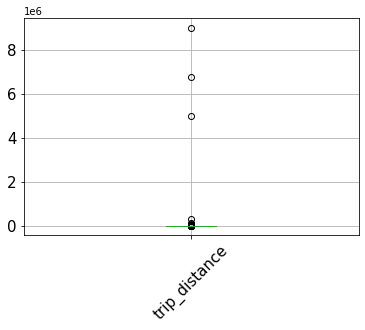

In [5]:
distance_boxplot = cleaned_yellow_09.boxplot(column="trip_distance" , rot=45, fontsize=15)

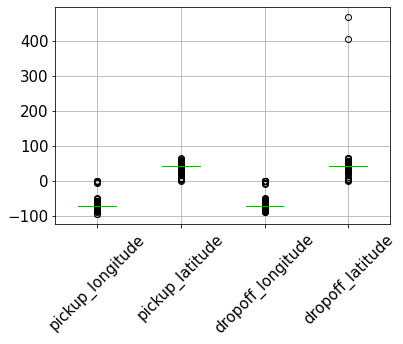

In [6]:
# further clean the noisy data from PUDO_location
# we clearly see there are noisy data and outliers
PU_DO_boxplot = cleaned_yellow_09.boxplot(column=PUDO_location , rot=45, fontsize=15)

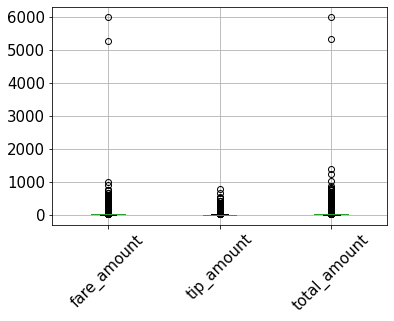

In [7]:
amount_boxplot = cleaned_yellow_09.boxplot(column=amount , rot=45, fontsize=15)

In [8]:
# clean noisy data and outliers
#https://stackoverflow.com/questions/35827863/remove-outliers-in-pandas-dataframe-using-percentiles
Q1 = cleaned_yellow_09.quantile(0.25)
Q3 = cleaned_yellow_09.quantile(0.75)
IQR = Q3 - Q1

cleaned= cleaned_yellow_09[~((cleaned_yellow_09< (Q1 - 5 * IQR)) |(cleaned_yellow_09> (Q3 + 5 * IQR))).any(axis=1)]

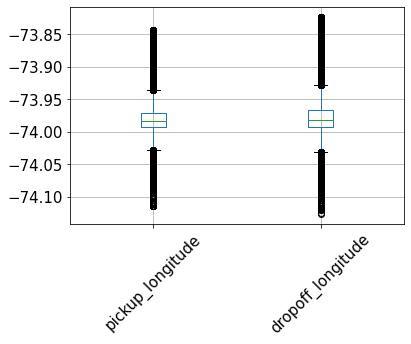

In [9]:
# show cleaned longitude data

longitude_boxplot = cleaned.boxplot(column=longitude_location , rot=45, fontsize=15)

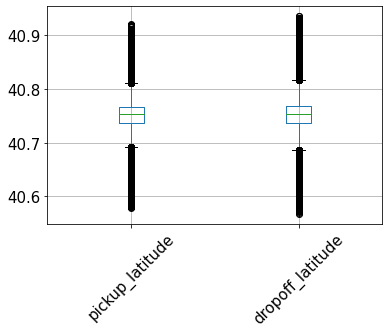

In [10]:
# show cleaned longitude data

longitude_boxplot = cleaned.boxplot(column=latitude_location , rot=45, fontsize=15)

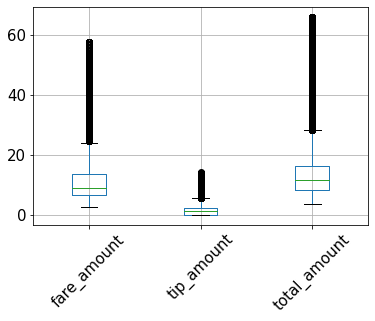

In [11]:
# show cleaned amount data

amount_boxplot = cleaned.boxplot(column=amount , rot=45, fontsize=15)

In [12]:
 def lat2mercer(coords):
    """
    Function which converts latitude to its mercer coordinate representation
    """
    k = 6378137
    converted = list()
    for lat in coords:
        converted.append(np.log(np.tan((90 + lat) * np.pi/360.0)) * k)
    return converted

def lon2mercer(coords):
 
    k = 6378137
    converted = list()
    for lon in coords:
        converted.append(lon * (k * np.pi/180.0))
    return converted

In [13]:
cleaned['DOX'] = cleaned['dropoff_longitude'].apply(lambda x: lon2mercer([x])[0])
cleaned['DOY'] = cleaned['dropoff_latitude'].apply(lambda x: lat2mercer([x])[0])

cleaned['PUX'] = cleaned['pickup_longitude'].apply(lambda x: lon2mercer([x])[0])
cleaned['PUY'] = cleaned['pickup_latitude'].apply(lambda x: lat2mercer([x])[0])

In [14]:
# save to feather 
cleaned.reset_index().to_feather('cleaned_yellow_09.feather')